In [ ]:
from google.colab import files
uploaded = files.upload()

Saving open+university+learning+analytics+dataset (1).zip to open+university+learning+analytics+dataset (1).zip


In [ ]:
import zipfile
import os

zip_path = next(iter(uploaded))  # Automatically get the uploaded filename
extract_path = "./oulad"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

NameError: name 'uploaded' is not defined

In [ ]:
import pandas as pd

base_path = "./oulad/"

# Load and clean columns
def load_clean_csv(filename):
    df = pd.read_csv(base_path + filename, encoding='utf-8-sig')
    df.columns = df.columns.str.strip()
    df.columns = df.columns.str.replace('\ufeff', '')
    return df

# Load all required files
student_info = load_clean_csv("studentInfo.csv")
student_assessment = load_clean_csv("studentAssessment.csv")
assessments = load_clean_csv("assessments.csv")
student_vle = load_clean_csv("studentVle.csv")
student_registration = load_clean_csv("studentRegistration.csv")

# Merge assessments using only id_assessment
sa_merged = pd.merge(student_assessment, assessments, on='id_assessment', how='left')

# Total score per student per module
student_scores = sa_merged.groupby(['id_student', 'code_module', 'code_presentation'])['score'].sum().reset_index()
student_scores.rename(columns={'score': 'total_score'}, inplace=True)

# Total VLE clicks
vle_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation'])['sum_click'].sum().reset_index()
vle_clicks.rename(columns={'sum_click': 'total_clicks'}, inplace=True)

# Merge everything
merged = pd.merge(student_info, student_scores, on=['id_student', 'code_module', 'code_presentation'], how='left')
merged = pd.merge(merged, vle_clicks, on=['id_student', 'code_module', 'code_presentation'], how='left')
merged = pd.merge(merged, student_registration, on=['id_student', 'code_module', 'code_presentation'], how='left')

# Fill missing values
merged['total_score'] = merged['total_score'].fillna(0)
merged['total_clicks'] = merged['total_clicks'].fillna(0)

# Save final merged file
merged.to_csv("oulad_merged_final.csv", index=False)
print(" Merged file saved as 'oulad_merged_final.csv'")

 Merged file saved as 'oulad_merged_final.csv'


In [ ]:
from google.colab import files
files.download("oulad_merged_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

# Load the file from the current working directory
df = pd.read_csv("oulad_merged_final.csv")

# Show classification labels
print("Unique values in 'final_result':", df['final_result'].unique())

# Show regression stats
print("\nStatistics for total_score:")
print(df['total_score'].describe())


Unique values in 'final_result': ['Pass' 'Withdrawn' 'Fail' 'Distinction']

Statistics for total_score:
count     32593
unique    22671
top           0
freq       6798
Name: total_score, dtype: object


In [ ]:
import pandas as pd

# Load the final merged dataset
df = pd.read_csv("oulad_merged_final.csv")

# Preview the first few rows
print(" Dataset loaded successfully.")
df.head()

 Dataset loaded successfully.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,total_score,total_clicks,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,7885808582,934.0,-159,?
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,7068706460,1435.0,-53,?
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,0,281.0,-92,12
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,7271748875,2158.0,-52,?
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,6930633575,1034.0,-176,?


In [ ]:
# Check dataset shape and basic info
print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Dataset Info:")
print(df.info())

# Check for missing values
print("\n🔹 Missing Values:")
print(df.isnull().sum())

# Handle missing values if needed (e.g., fill or drop)
# Already handled in previous preprocessing step:
# df['total_score'].fillna(0, inplace=True)
# df['total_clicks'].fillna(0, inplace=True)

# Check for class imbalance in the target classification column
print("\n🔹 Class Distribution in 'final_result':")
print(df['final_result'].value_counts())


🔹 Dataset Shape: (32593, 16)

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           32593 non-null  object 
 1   code_presentation     32593 non-null  object 
 2   id_student            32593 non-null  int64  
 3   gender                32593 non-null  object 
 4   region                32593 non-null  object 
 5   highest_education     32593 non-null  object 
 6   imd_band              32593 non-null  object 
 7   age_band              32593 non-null  object 
 8   num_of_prev_attempts  32593 non-null  int64  
 9   studied_credits       32593 non-null  int64  
 10  disability            32593 non-null  object 
 11  final_result          32593 non-null  object 
 12  total_score           32593 non-null  object 
 13  total_clicks          32593 non-null  float64
 14  date_registration     32

<ipython-input-8-8be31593f6bc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_result', data=df, palette='Set2')


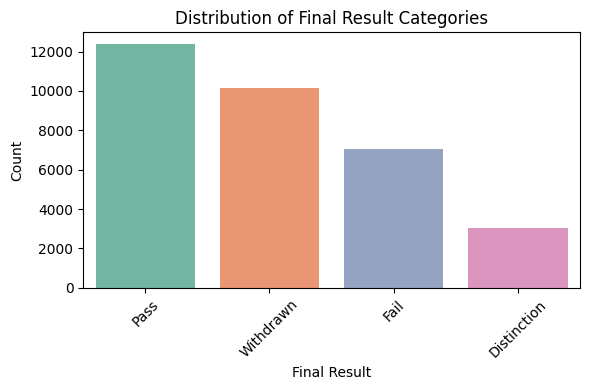

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='final_result', data=df, palette='Set2')
plt.title("Distribution of Final Result Categories")
plt.xlabel("Final Result")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Convert 'total_score' to numeric (coerce errors to NaN)
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')

# Re-check the data types
print("\n🔹 Data Types After Conversion:")
print(df.dtypes)

# Check for missing values after conversion
print("\n🔹 Missing Values After Conversion:")
print(df.isnull().sum())

# Optional: Remove outliers from 'total_score' and 'total_clicks' using IQR method
Q1 = df[['total_score', 'total_clicks']].quantile(0.25)
Q3 = df[['total_score', 'total_clicks']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['total_score', 'total_clicks']] < (Q1 - 1.5 * IQR)) | (df[['total_score', 'total_clicks']] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(" Data cleaning completed.")



🔹 Data Types After Conversion:
code_module              object
code_presentation        object
id_student                int64
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
total_score             float64
total_clicks            float64
date_registration        object
date_unregistration      object
dtype: object

🔹 Missing Values After Conversion:
code_module               0
code_presentation         0
id_student                0
gender                    0
region                    0
highest_education         0
imd_band                  0
age_band                  0
num_of_prev_attempts      0
studied_credits           0
disability                0
final_result              0
total_score             161
total_clicks              0
date_registrat

In [ ]:
df.shape

(23874, 16)

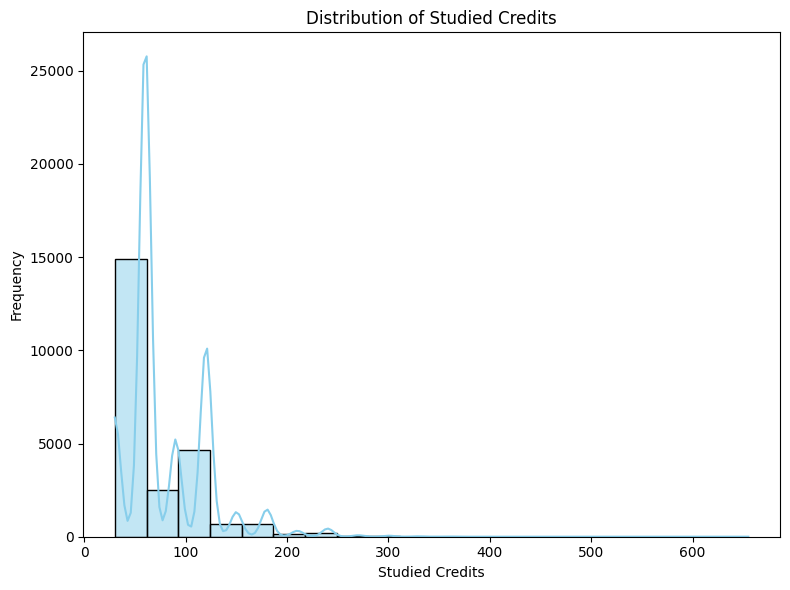

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot histogram for 'studied_credits'
plt.figure(figsize=(8,6))
sns.histplot(df['studied_credits'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Studied Credits')
plt.xlabel('Studied Credits')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your merged data (make sure this CSV is in your working directory)
df = pd.read_csv("oulad_merged_final.csv")

# 2. List the other numeric columns you want histograms for
numeric_cols = ['total_clicks', 'num_of_prev_attempts']

# 3. Loop and plot
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f"Distribution of {col.replace('_',' ').title()}")
    plt.xlabel(col.replace('_',' ').title())
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'oulad_merged_final.csv'

<ipython-input-13-f2776b3b05e7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='final_result', data=df, palette='Set2')


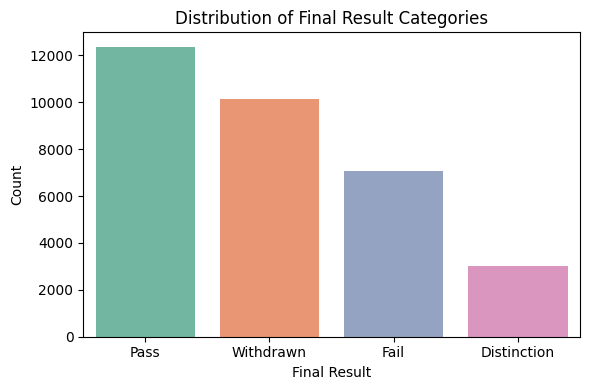

In [ ]:
# Plot countplot for 'final_result'
plt.figure(figsize=(6,4))
sns.countplot(x='final_result', data=df, palette='Set2')
plt.title("Distribution of Final Result Categories")
plt.xlabel("Final Result")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


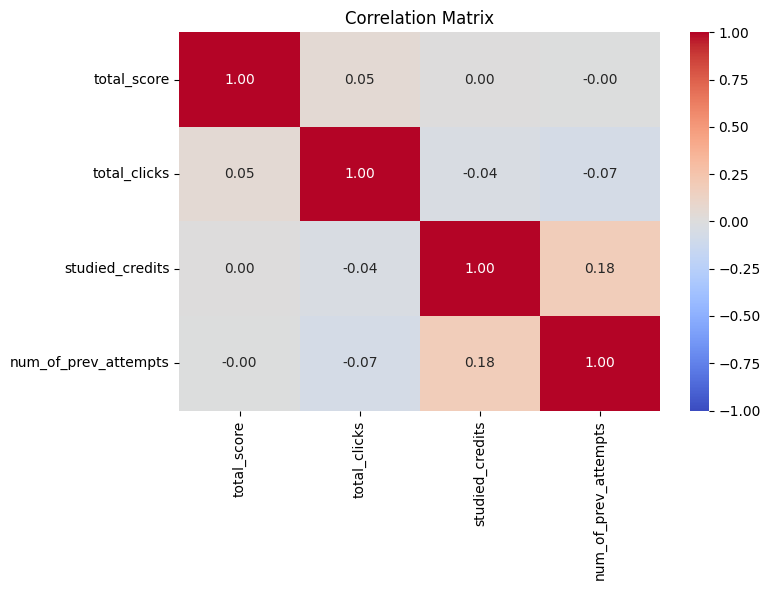

                      total_score  total_clicks  studied_credits  \
total_score              1.000000      0.051879         0.002057   
total_clicks             0.051879      1.000000        -0.036678   
studied_credits          0.002057     -0.036678         1.000000   
num_of_prev_attempts    -0.004983     -0.069358         0.181709   

                      num_of_prev_attempts  
total_score                      -0.004983  
total_clicks                     -0.069358  
studied_credits                   0.181709  
num_of_prev_attempts              1.000000  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to clean and analyze
cols = ['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']

# 1. Clean and convert in one go
for col in cols:
    # Remove all non-digit characters, then convert to numeric (invalid parses become NaN)
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r'\D+', '', regex=True)
        .pipe(pd.to_numeric, errors='coerce')
    )

# 2. Drop any rows with NaNs in these key features
df_clean = df.dropna(subset=cols)

# 3. Compute the correlation matrix
corr_matrix = df_clean[cols].corr()

# 4. Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar=True
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 5. Print out the numeric matrix
print(corr_matrix)



In [ ]:
# Impute missing values for numeric columns
df[['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']] = df[['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']].fillna(df[['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']].mean())

# After imputation, check if missing values are handled
print("\n🔹 Missing Values After Imputation:")
print(df.isnull().sum())


🔹 Missing Values After Imputation:
code_module             0
code_presentation       0
id_student              0
gender                  0
region                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
total_score             0
total_clicks            0
date_registration       0
date_unregistration     0
dtype: int64


In [ ]:
# Drop rows with missing values in key columns
df.dropna(subset=['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts'], inplace=True)

# After dropping, check the shape of the dataset
print("\n🔹 Dataset Shape After Dropping Missing Values:")
print(df.shape)


🔹 Dataset Shape After Dropping Missing Values:
(32593, 16)


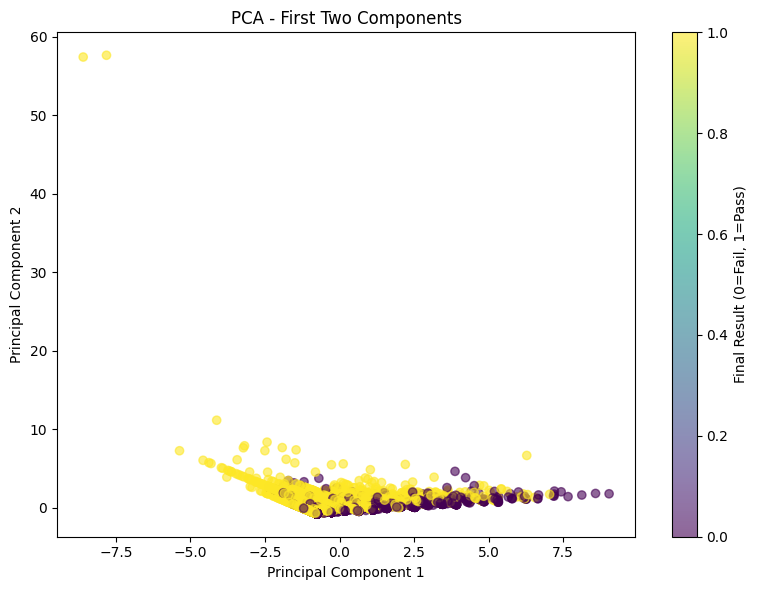

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the relevant columns
scaled_data = scaler.fit_transform(df[['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Plot the PCA components
plt.figure(figsize=(8,6))
plt.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    c=df['final_result'].map({'Fail': 0, 'Pass': 1}),
    cmap='viridis',
    alpha=0.6
)
plt.title("PCA - First Two Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Final Result (0=Fail, 1=Pass)')
plt.tight_layout()
plt.show()



In [ ]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(df[['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']]))

# Set a threshold for detecting anomalies (e.g., Z-score > 3)
anomalies = (z_scores > 3).all(axis=1)

# Check anomalies
print(f"Number of anomalies detected: {np.sum(anomalies)}")
df_anomalies = df[anomalies]
print(df_anomalies)



Number of anomalies detected: 0
Empty DataFrame
Columns: [code_module, code_presentation, id_student, gender, region, highest_education, imd_band, age_band, num_of_prev_attempts, studied_credits, disability, final_result, total_score, total_clicks, date_registration, date_unregistration]
Index: []


<ipython-input-20-dcc214be6621>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='final_result', y='total_score', data=df, palette='Set2')


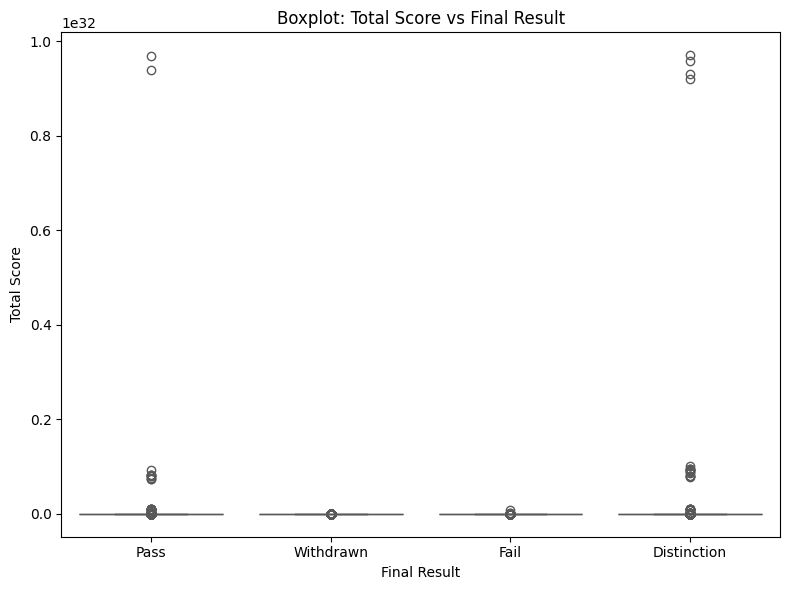

In [ ]:
# Boxplot to detect anomalies in 'total_score' and 'total_clicks'
plt.figure(figsize=(8,6))
sns.boxplot(x='final_result', y='total_score', data=df, palette='Set2')
plt.title("Boxplot: Total Score vs Final Result")
plt.xlabel("Final Result")
plt.ylabel("Total Score")
plt.tight_layout()
plt.show()


📊 Confusion Matrix:
                     Predicted: Distinction  Predicted: Fail  Predicted: Pass  \
Actual: Distinction                     129               40              416   
Actual: Fail                             46              406              391   
Actual: Pass                            254              315             1600   
Actual: Withdrawn                        40              399              291   

                     Predicted: Withdrawn  
Actual: Distinction                    56  
Actual: Fail                          534  
Actual: Pass                          253  
Actual: Withdrawn                    1317  


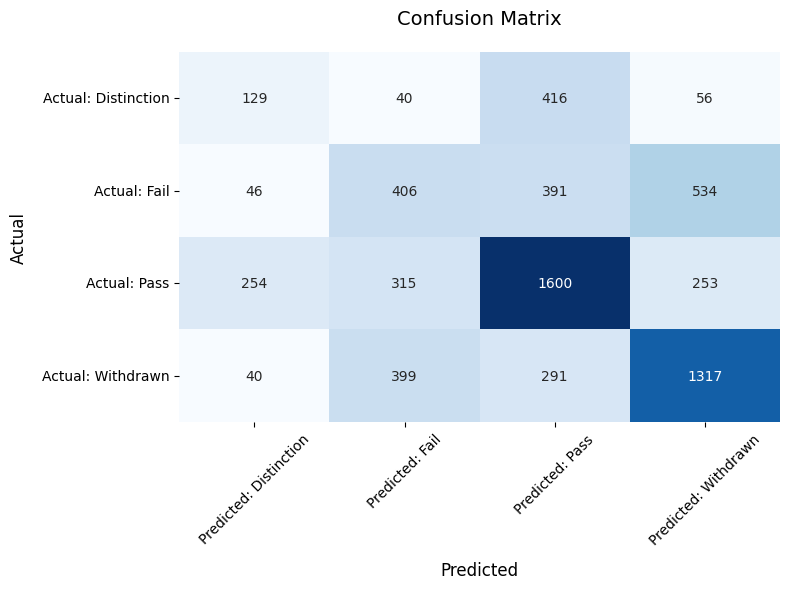


🔍 Evaluation Metrics (Weighted):
Accuracy :  0.5321
Precision:  0.5153
Recall   :  0.5321
F1 Score :  0.5218

📋 Classification Report (per class):
              precision    recall  f1-score   support

 Distinction       0.28      0.20      0.23       641
        Fail       0.35      0.29      0.32      1377
        Pass       0.59      0.66      0.62      2422
   Withdrawn       0.61      0.64      0.63      2047

    accuracy                           0.53      6487
   macro avg       0.46      0.45      0.45      6487
weighted avg       0.52      0.53      0.52      6487



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score,
    precision_score, recall_score,
    f1_score, classification_report
)

# Load dataset
df = pd.read_csv("oulad_merged_final.csv")

# Clean numeric columns (coerce invalid strings to NaN)
for col in ['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values
df.dropna(subset=['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts', 'final_result'], inplace=True)

# Encode target labels
label_encoder = LabelEncoder()
df['final_result_encoded'] = label_encoder.fit_transform(df['final_result'])

# Features and target
features = ['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']
X = df[features]
y = df['final_result_encoded']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Convert labels back to class names
y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)
label_order = ['Distinction', 'Fail', 'Pass', 'Withdrawn']

# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=label_order)
cm_df = pd.DataFrame(cm,
    index=[f'Actual: {label}' for label in label_order],
    columns=[f'Predicted: {label}' for label in label_order]
)

# Display confusion matrix as table
print("📊 Confusion Matrix:")
print(cm_df)

# Plot heatmap
plt.figure(figsize=(8,6))
ax = sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set single axis labels
ax.set_title("Confusion Matrix", fontsize=14, pad=20)
ax.set_xlabel("Predicted", fontsize=12, labelpad=10)
ax.set_ylabel("Actual", fontsize=12, labelpad=10)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Overall evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("\n🔍 Evaluation Metrics (Weighted):")
print(f"Accuracy :  {accuracy:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"Recall   :  {recall:.4f}")
print(f"F1 Score :  {f1:.4f}")

# Classification report
print("\n📋 Classification Report (per class):")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler

# 1. Load the cleaned dataset
df = pd.read_csv("oulad_merged_final.csv")

# 2. Split into X (features) and y (target)
X = df.drop(columns=[
    "final_result",
    "id_student",
    "date_registration",
    "date_unregistration"
])
y = df["final_result"]

# 3. Specify which columns are categorical vs numeric
categorical_cols = [
    "code_module", "code_presentation", "gender", "region",
    "highest_education", "imd_band", "age_band", "disability"
]
numeric_cols = [
    "total_score", "total_clicks", "studied_credits", "num_of_prev_attempts"
]

# 4a. Numeric pipeline: coerce strings → median impute → standard scale
numeric_pipeline = Pipeline([
    ("to_numeric", FunctionTransformer(
        lambda df: df.apply(pd.to_numeric, errors="coerce")
    )),
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# 4b. Categorical pipeline: fill missing → one-hot encode
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="__MISSING__")),
    ("onehot", OneHotEncoder(
        handle_unknown="ignore",
        sparse_output=False  # use sparse_output in newer sklearn
    )),
])

# 5. Combine pipelines with ColumnTransformer
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_cols),
    ("cat", categorical_pipeline, categorical_cols),
], remainder="drop")

# 6. Full pipeline (attach your classifier at the end if you like)
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    # ("classifier", YourEstimator())   ← add your model here
])

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 8. Fit & transform training data; transform test data
X_train_trans = pipeline.fit_transform(X_train)
X_test_trans  = pipeline.transform(X_test)

# 9. Display the resulting shapes
print(f"X_train_trans shape: {X_train_trans.shape}")
print(f"X_test_trans  shape: {X_test_trans.shape}")

# 10. Build meaningful feature names for preview
ohe = pipeline.named_steps["preprocessor"] \
             .named_transformers_["cat"] \
             .named_steps["onehot"]
num_feature_names = numeric_cols
cat_feature_names = ohe.get_feature_names_out(categorical_cols)
all_feature_names = list(num_feature_names) + list(cat_feature_names)

# 11. Preview first 5 rows
preview_df = pd.DataFrame(X_train_trans[:5], columns=all_feature_names)
print("\nPreview of first 5 transformed rows:")
print(preview_df)

# 12. (Optional) Balance classes via RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X_train_trans, y_train)
print(f"\nAfter oversampling, training shape: {X_balanced.shape}")


X_train_trans shape: (26074, 51)
X_test_trans  shape: (6519, 51)

Preview of first 5 transformed rows:
   total_score  total_clicks  studied_credits  num_of_prev_attempts  \
0     -0.01894     -0.525090        -0.479726             -0.340463   
1     -0.01894     -0.094119        -0.479726             -0.340463   
2     -0.01894     -0.710300         0.973862             -0.340463   
3     -0.01894      0.377218        -0.479726             -0.340463   
4     -0.01894      1.772826         0.247068             -0.340463   

   code_module_AAA  code_module_BBB  code_module_CCC  code_module_DDD  \
0              0.0              1.0              0.0              0.0   
1              0.0              0.0              0.0              1.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              1.0              0.0   
4              0.0              0.0              0.0              1.0   

   code_module_EEE  code_module

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# -- assume `df`, `X`, `preprocessor` are already defined as before --

# Define your classification target
y = df["final_result"]  # this replaces the undefined y_class

# Split for classification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Classification models
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "Bagging": BaggingClassifier(n_estimators=50),
    "Boosting": AdaBoostClassifier(n_estimators=50),
}

# Baseline CV for classification
print("=== Classification Baselines (CV Accuracy) ===")
for name, model in classifiers.items():
    pipe = Pipeline([
        ("preproc", preprocessor),
        ("clf", model)
    ])
    scores = cross_val_score(
        pipe, X_train, y_train,
        cv=5,
        scoring="accuracy"
    )
    print(f"{name:20s} →  Accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

# Example hyperparameter tuning for Logistic Regression
grid = GridSearchCV(
    Pipeline([("preproc", preprocessor), ("clf", LogisticRegression())]),
    param_grid={"clf__C": [0.01, 0.1, 1, 10]},
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train, y_train)
print(f"\nLogReg best C: {grid.best_params_['clf__C']}  (CV acc: {grid.best_score_:.3f})")


=== Classification Baselines (CV Accuracy) ===
LogisticRegression   →  Accuracy: 0.607 ± 0.002
SVM                  →  Accuracy: 0.617 ± 0.005
DecisionTree         →  Accuracy: 0.541 ± 0.003
RandomForest         →  Accuracy: 0.640 ± 0.004
Bagging              →  Accuracy: 0.630 ± 0.005
Boosting             →  Accuracy: 0.609 ± 0.004

LogReg best C: 10  (CV acc: 0.607)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. File name (extracted from ML_parul.pdf) :contentReference[oaicite:2]{index=2}:contentReference[oaicite:3]{index=3}
csv_file = "oulad_merged_final.csv"

# 2. Load the merged dataset
df = pd.read_csv(csv_file)

# 3a. Prepare regression data
X_reg = df[['total_clicks', 'studied_credits', 'num_of_prev_attempts']].apply(pd.to_numeric, errors='coerce')
y_reg = pd.to_numeric(df['total_score'], errors='coerce')

# 4a. Split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg,
    test_size=0.2,
    random_state=42
)

# 3b. Prepare classification data (use all four predictors)
X_clf = df[['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']].apply(pd.to_numeric, errors='coerce')
y_clf = df['final_result']  # categorical target

# 4b. Split for classification (stratify to preserve class ratios) :contentReference[oaicite:4]{index=4}:contentReference[oaicite:5]{index=5}
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf,
    test_size=0.2,
    random_state=42,
    stratify=y_clf
)

print(f"Regression train shape: {X_train_reg.shape}, {y_train_reg.shape}")
print(f"Classification train shape: {X_train_clf.shape}, {y_train_clf.shape}")


Regression train shape: (26074, 3), (26074,)
Classification train shape: (26074, 4), (26074,)


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 1. Adjust this path if needed
csv_path = "oulad_merged_final.csv"
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}. Please update the path.")

# 2. Load and clean data
df = pd.read_csv(csv_path)
numeric_cols = ['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=numeric_cols)

# 3. Define features and target
X = df[['total_clicks', 'studied_credits', 'num_of_prev_attempts']]
y = df['total_score']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Build and train pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0, random_state=42))
])
pipeline.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


RMSE: 1727723147627286224177150820352.0000
R²:   0.0038


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Load & clean
df = pd.read_csv("oulad_merged_final.csv")
for col in ['total_score','total_clicks','studied_credits','num_of_prev_attempts']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['total_score','total_clicks','studied_credits','num_of_prev_attempts','final_result'])

# 2. Split
# Regression
X_reg = df[['total_clicks','studied_credits','num_of_prev_attempts']]
y_reg = df['total_score']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Classification
X_clf = df[['total_score','total_clicks','studied_credits','num_of_prev_attempts']]
le = LabelEncoder()
y_clf = le.fit_transform(df['final_result'])
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# 3. Regression models
reg_models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

print("=== Regression Results ===")
for name, model in reg_models.items():
    model.fit(X_train_reg, y_train_reg)
    preds = model.predict(X_test_reg)
    rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
    r2   = r2_score(y_test_reg, preds)
    print(f"{name}: RMSE = {rmse:.3f}, R² = {r2:.3f}")

# 4. Classification models
clf_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

print("\n=== Classification Results ===")
for name, model in clf_models.items():
    model.fit(X_train_clf, y_train_clf)
    preds = model.predict(X_test_clf)
    acc = accuracy_score(y_test_clf, preds)
    print(f"\n{name}: Accuracy = {acc:.3f}")
    print(classification_report(y_test_clf, preds, target_names=le.classes_))


=== Regression Results ===
LinearRegression: RMSE = 1727723043064910647256898600960.000, R² = 0.004
Ridge: RMSE = 1727723044065591625635183198208.000, R² = 0.004
Lasso: RMSE = 1727723043064910647256898600960.000, R² = 0.004

=== Classification Results ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+64, tolerance: 3.608e+60
  model = cd_fast.enet_coordinate_descent(



LogisticRegression: Accuracy = 0.183
              precision    recall  f1-score   support

 Distinction       0.12      1.00      0.21       605
        Fail       0.00      0.00      0.00      1398
        Pass       0.00      0.00      0.00      2466
   Withdrawn       0.91      0.29      0.44      2018

    accuracy                           0.18      6487
   macro avg       0.26      0.32      0.16      6487
weighted avg       0.29      0.18      0.16      6487



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVC: Accuracy = 0.380
              precision    recall  f1-score   support

 Distinction       1.00      0.00      0.00       605
        Fail       0.00      0.00      0.00      1398
        Pass       0.38      1.00      0.55      2466
   Withdrawn       0.00      0.00      0.00      2018

    accuracy                           0.38      6487
   macro avg       0.35      0.25      0.14      6487
weighted avg       0.24      0.38      0.21      6487


DecisionTree: Accuracy = 0.657
              precision    recall  f1-score   support

 Distinction       0.52      0.05      0.09       605
        Fail       0.48      0.14      0.22      1398
        Pass       0.65      0.96      0.78      2466
   Withdrawn       0.70      0.83      0.76      2018

    accuracy                           0.66      6487
   macro avg       0.59      0.49      0.46      6487
weighted avg       0.62      0.66      0.59      6487



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



RandomForest: Accuracy = 0.641
              precision    recall  f1-score   support

 Distinction       0.40      0.27      0.32       605
        Fail       0.45      0.31      0.37      1398
        Pass       0.68      0.83      0.75      2466
   Withdrawn       0.72      0.75      0.73      2018

    accuracy                           0.64      6487
   macro avg       0.56      0.54      0.54      6487
weighted avg       0.62      0.64      0.62      6487


Bagging: Accuracy = 0.637
              precision    recall  f1-score   support

 Distinction       0.42      0.33      0.37       605
        Fail       0.43      0.32      0.37      1398
        Pass       0.69      0.80      0.74      2466
   Withdrawn       0.71      0.74      0.73      2018

    accuracy                           0.64      6487
   macro avg       0.56      0.55      0.55      6487
weighted avg       0.62      0.64      0.62      6487


GradientBoosting: Accuracy = 0.669
              precision    recall  

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Load data
csv_path = 'oulad_merged_final.csv'
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}. Please update the path.")
df = pd.read_csv(csv_path)

# 2. Clean & prepare numeric features
features = ['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']
for c in features:
    df[c] = pd.to_numeric(
        df[c].astype(str).str.replace(r'[^0-9\.]', '', regex=True),
        errors='coerce'
    )
df = df.dropna(subset=features + ['final_result']).reset_index(drop=True)

X = df[features]

# 3. Encode target labels and keep encoder for inverse mapping
le = LabelEncoder()
y = le.fit_transform(df['final_result'])
class_names = le.classes_

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Define base learners and meta-learner
estimators = [
    ('rf', RandomForestClassifier(
        n_estimators=100, random_state=42, class_weight='balanced'
    )),
    ('xgb', XGBClassifier(
        use_label_encoder=False,
        eval_metric='mlogloss',
        n_estimators=100,
        random_state=42
    ))
]
meta_learner = LogisticRegression(
    solver='saga',      # better for large-scale & sparse data
    max_iter=5000,      # increase iterations to ensure convergence
    class_weight='balanced',
    random_state=42
)

stack_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# 6. Build a pipeline to scale features before stacking
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('stacking', stack_clf)
])

# 7. Fit & evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(
    y_test, y_pred,
    target_names=class_names
))


Accuracy: 0.5395

              precision    recall  f1-score   support

 Distinction       0.30      0.57      0.39       605
        Fail       0.37      0.48      0.42      1410
        Pass       0.67      0.53      0.59      2472
   Withdrawn       0.73      0.59      0.65      2027

    accuracy                           0.54      6514
   macro avg       0.52      0.54      0.51      6514
weighted avg       0.59      0.54      0.55      6514



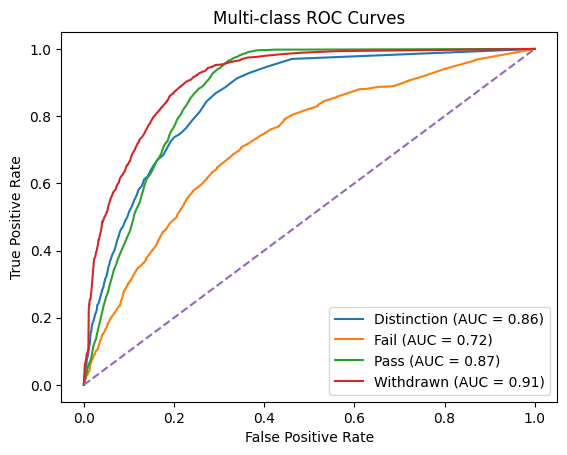

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Load & clean data
df = pd.read_csv("oulad_merged_final.csv")
for col in ['total_score','total_clicks','studied_credits','num_of_prev_attempts']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['total_score','total_clicks','studied_credits','num_of_prev_attempts','final_result'])

# 2. Split classification data
X = df[['total_score','total_clicks','studied_credits','num_of_prev_attempts']]
le = LabelEncoder()
y = le.fit_transform(df['final_result'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Binarize labels
y_test_bin = label_binarize(y_test, classes=range(len(le.classes_)))
n_classes = y_test_bin.shape[1]

# 4. Train classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_score = rf.predict_proba(X_test)

# 5. Compute ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{le.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curves")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# 1. Load & clean (make sure your CSV path is correct)
df = pd.read_csv("oulad_merged_final.csv")
for col in ['total_score','total_clicks','studied_credits','num_of_prev_attempts']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['total_score','total_clicks','studied_credits','num_of_prev_attempts','final_result'])

# 2. Split data
X = df[['total_score','total_clicks','studied_credits','num_of_prev_attempts']]
le = LabelEncoder()
y = le.fit_transform(df['final_result'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Baseline RF (no balancing)
rf_base = RandomForestClassifier(n_estimators=100, random_state=42)
rf_base.fit(X_train, y_train)
pred_base = rf_base.predict(X_test)
acc_base = accuracy_score(y_test, pred_base)
print(f"Baseline RF Accuracy: {acc_base:.3f}")
print(classification_report(y_test, pred_base, target_names=le.classes_, zero_division=0))

# 4. Balanced RF (class weights)
rf_bal = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_bal.fit(X_train, y_train)
pred_bal = rf_bal.predict(X_test)
acc_bal = accuracy_score(y_test, pred_bal)
print(f"\nBalanced RF Accuracy: {acc_bal:.3f}")
print(classification_report(y_test, pred_bal, target_names=le.classes_, zero_division=0))


Baseline RF Accuracy: 0.641
              precision    recall  f1-score   support

 Distinction       0.40      0.27      0.32       605
        Fail       0.45      0.31      0.37      1398
        Pass       0.68      0.83      0.75      2466
   Withdrawn       0.72      0.75      0.73      2018

    accuracy                           0.64      6487
   macro avg       0.56      0.54      0.54      6487
weighted avg       0.62      0.64      0.62      6487


Balanced RF Accuracy: 0.635
              precision    recall  f1-score   support

 Distinction       0.43      0.27      0.33       605
        Fail       0.42      0.32      0.37      1398
        Pass       0.68      0.84      0.75      2466
   Withdrawn       0.71      0.72      0.72      2018

    accuracy                           0.64      6487
   macro avg       0.56      0.54      0.54      6487
weighted avg       0.61      0.64      0.62      6487



=== Regression Performance ===
LinearRegression: MAE=70853953122749625413725585408.000, RMSE=1727723043064910647256898600960.000, R²=0.004
Ridge: MAE=70853928458311496998330564608.000, RMSE=1727723044065591625635183198208.000, R²=0.004
Lasso: MAE=70853953122749625413725585408.000, RMSE=1727723043064910647256898600960.000, R²=0.004

=== Classification Performance ===


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.801e+64, tolerance: 3.608e+60
  model = cd_fast.enet_coordinate_descent(


LogisticRegression: Acc=0.183, Prec=0.295, Rec=0.183, F1=0.157, AUC=0.714
SVC: Acc=0.380, Prec=0.238, Rec=0.380, F1=0.210, AUC=0.649
DecisionTree: Acc=0.657, Prec=0.618, Rec=0.657, F1=0.586, AUC=0.848
RandomForest: Acc=0.641, Prec=0.617, Rec=0.641, F1=0.622, AUC=0.850
Bagging: Acc=0.637, Prec=0.617, Rec=0.637, F1=0.623, AUC=0.850
GradientBoosting: Acc=0.669, Prec=0.638, Rec=0.669, F1=0.623, AUC=0.871


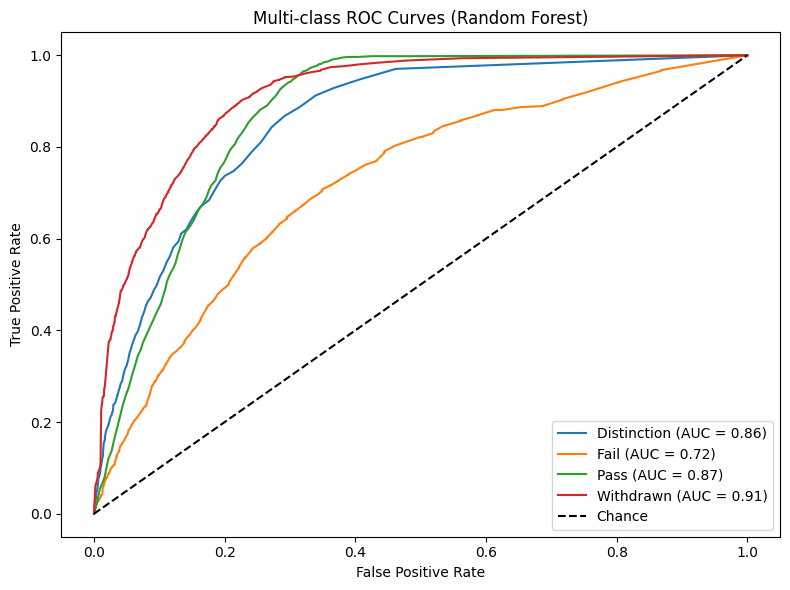

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report
)
from sklearn.preprocessing import LabelEncoder, label_binarize

# 1. Load & clean data
df = pd.read_csv("oulad_merged_final.csv")
for col in ['total_score','total_clicks','studied_credits','num_of_prev_attempts']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=['total_score','total_clicks','studied_credits','num_of_prev_attempts','final_result'])

# 2. Split into regression and classification sets
# Regression
X_reg = df[['total_clicks','studied_credits','num_of_prev_attempts']]
y_reg = df['total_score']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Classification
X_clf = df[['total_score','total_clicks','studied_credits','num_of_prev_attempts']]
le = LabelEncoder()
y_clf = le.fit_transform(df['final_result'])
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

# 3. Regression models & evaluation
reg_models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1)
}

print("=== Regression Performance ===")
for name, model in reg_models.items():
    model.fit(X_train_reg, y_train_reg)
    preds = model.predict(X_test_reg)
    mae = mean_absolute_error(y_test_reg, preds)
    rmse = np.sqrt(mean_squared_error(y_test_reg, preds))
    r2   = r2_score(y_test_reg, preds)
    print(f"{name}: MAE={mae:.3f}, RMSE={rmse:.3f}, R²={r2:.3f}")

# 4. Classification models & evaluation
clf_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVC': SVC(probability=True),
    'DecisionTree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Binarize labels for multiclass AUC
y_test_bin = label_binarize(y_test_clf, classes=range(len(le.classes_)))

print("\n=== Classification Performance ===")
for name, model in clf_models.items():
    model.fit(X_train_clf, y_train_clf)
    preds = model.predict(X_test_clf)
    proba = model.predict_proba(X_test_clf)
    acc  = accuracy_score(y_test_clf, preds)
    prec = precision_score(y_test_clf, preds, average='weighted', zero_division=0)
    rec  = recall_score(y_test_clf, preds, average='weighted', zero_division=0)
    f1   = f1_score(y_test_clf, preds, average='weighted', zero_division=0)
    auc_score = roc_auc_score(y_test_bin, proba, average='weighted', multi_class='ovr')
    print(f"{name}: Acc={acc:.3f}, Prec={prec:.3f}, Rec={rec:.3f}, F1={f1:.3f}, AUC={auc_score:.3f}")

# 5. Plot ROC curves for RandomForest
rf = clf_models['RandomForest']
proba_rf = rf.predict_proba(X_test_clf)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(le.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], proba_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i, label in enumerate(le.classes_):
    plt.plot(fpr[i], tpr[i], label=f"{label} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curves (Random Forest)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
# predict_student_outcome.py

import os
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

MODEL_PATH      = 'best_clf_model.pkl'
ENCODER_PATH    = 'label_encoder.pkl'
CSV_PATH        = 'oulad_merged_final.csv'

def train_and_save_classifier():
    # 1. Load & clean data
    df = pd.read_csv(CSV_PATH)
    for col in ['total_score','total_clicks','studied_credits','num_of_prev_attempts']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df = df.dropna(subset=['total_score','total_clicks','studied_credits','num_of_prev_attempts','final_result'])

    # 2. Prepare features and labels
    X = df[['total_score','total_clicks','studied_credits','num_of_prev_attempts']]
    le = LabelEncoder()
    y = le.fit_transform(df['final_result'])

    # 3. Split & train
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # 4. Persist artifacts
    joblib.dump(clf, MODEL_PATH)
    joblib.dump(le, ENCODER_PATH)
    print(f"Trained and saved model to '{MODEL_PATH}' and encoder to '{ENCODER_PATH}'.")
    return clf, le

def load_or_train():
    if os.path.exists(MODEL_PATH) and os.path.exists(ENCODER_PATH):
        clf = joblib.load(MODEL_PATH)
        le  = joblib.load(ENCODER_PATH)
    else:
        print("Model or encoder not found; training a new classifier...")
        if not os.path.exists(CSV_PATH):
            raise FileNotFoundError(f"Data file '{CSV_PATH}' not found.")
        clf, le = train_and_save_classifier()
    return clf, le

def get_numeric_input(prompt, cast_type=float):
    while True:
        try:
            return cast_type(input(prompt))
        except ValueError:
            print(f"Invalid input. Please enter a valid {cast_type.__name__}.")

def main():
    clf_model, le = load_or_train()
    print("=== Student Outcome Predictor ===\nProvide the following metrics:\n")
    total_score       = get_numeric_input("1. Total Score (e.g., 78.5): ")
    total_clicks      = get_numeric_input("2. Total VLE Clicks (e.g., 120): ", int)
    studied_credits   = get_numeric_input("3. Studied Credits (e.g., 30): ", int)
    num_prev_attempts = get_numeric_input("4. Previous Attempts Count (e.g., 1): ", int)

    features = np.array([[total_score, total_clicks, studied_credits, num_prev_attempts]])
    pred_code = clf_model.predict(features)[0]
    pred_label = le.inverse_transform([pred_code])[0]
    print(f"\nPredicted Outcome: **{pred_label.upper()}**")

if __name__ == "__main__":
    main()


=== Student Outcome Predictor ===
Provide the following metrics:

1. Total Score (e.g., 78.5): 25
2. Total VLE Clicks (e.g., 120): 15
3. Studied Credits (e.g., 30): 20
4. Previous Attempts Count (e.g., 1): 2

Predicted Outcome: **FAIL**


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 1. Load dataset
csv_path = 'oulad_merged_final.csv'  # update this path if needed
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}. Please update the path.")
df = pd.read_csv(csv_path)

# 2. Preprocessing
df.replace('?', np.nan, inplace=True)
df['label'] = df['final_result'].map({'Pass': 1, 'Distinction': 1, 'Fail': 0, 'Withdrawn': 0})
df.drop(columns=['id_student', 'date_registration', 'date_unregistration', 'final_result'], inplace=True)
df.dropna(subset=df.columns, inplace=True)  # remove any rows with missing features or label

# 3. Train/test split
X = df.drop(columns='label')
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4. Preprocessing pipelines
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols     = X.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ("num", StandardScaler(), numeric_cols),
])

# 5. Define pipelines
logreg_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", LogisticRegression(max_iter=2000, class_weight='balanced', solver='liblinear')),
])

svc_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", SVC(kernel='rbf', C=10, gamma='scale', class_weight='balanced')),
])

# 6. Train & evaluate both models
for name, model in [("Logistic Regression", logreg_pipe), ("SVC", svc_pipe)]:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc   = accuracy_score(y_test, preds)
    print(f"{name} accuracy: {acc:.4f}")
    print(f"{name} classification report:\n{classification_report(y_test, preds)}")
    print(f"{name} confusion matrix:\n{confusion_matrix(y_test, preds)}\n")


Logistic Regression accuracy: 0.8414
Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.84      4201
           1       0.79      0.89      0.84      3664

    accuracy                           0.84      7865
   macro avg       0.84      0.84      0.84      7865
weighted avg       0.85      0.84      0.84      7865

Logistic Regression confusion matrix:
[[3343  858]
 [ 389 3275]]



In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# 1. Load dataset
csv_path = 'oulad_merged_final.csv'  # update this path if needed
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}. Please update the path.")
df = pd.read_csv(csv_path)

# 2. Preprocessing
df.replace('?', np.nan, inplace=True)
df['label'] = df['final_result'].map({'Pass': 1, 'Distinction': 1, 'Fail': 0, 'Withdrawn': 0})
df.drop(columns=['id_student', 'date_registration', 'date_unregistration', 'final_result'], inplace=True)
df.dropna(subset=df.columns, inplace=True)  # remove rows with any missing values

# 3. Train/test split
X = df.drop(columns='label')
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 4. Preprocessing pipelines
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols     = X.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols),
    ("num", StandardScaler(), numeric_cols),
])

# 5. Random Forest pipeline
rf_pipe = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        class_weight='balanced',
        random_state=42
    )),
])

# 6. Train & evaluate Random Forest
rf_pipe.fit(X_train, y_train)
rf_preds = rf_pipe.predict(X_test)
rf_acc   = accuracy_score(y_test, rf_preds)
print(f"Random Forest accuracy: {rf_acc:.4f}")
print("Classification report:\n", classification_report(y_test, rf_preds))
print("Confusion matrix:\n", confusion_matrix(y_test, rf_preds))


Random Forest accuracy: 0.8236
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      4201
           1       0.78      0.86      0.82      3664

    accuracy                           0.82      7865
   macro avg       0.82      0.83      0.82      7865
weighted avg       0.83      0.82      0.82      7865

Confusion matrix:
 [[3320  881]
 [ 506 3158]]


Decision Tree Accuracy: 0.5898
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.37      0.35       605
           1       0.38      0.35      0.37      1398
           2       0.68      0.67      0.67      2466
           3       0.69      0.72      0.71      2018

    accuracy                           0.59      6487
   macro avg       0.52      0.53      0.53      6487
weighted avg       0.59      0.59      0.59      6487

Gradient Boosting Accuracy: 0.669
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.12      0.20       605
           1       0.51      0.24      0.33      1398
           2       0.67      0.93      0.78      2466
           3       0.73      0.80      0.76      2018

    accuracy                           0.67      6487
   macro avg       0.60      0.53      0.52      6487
weighted avg       0.64      0.67      0

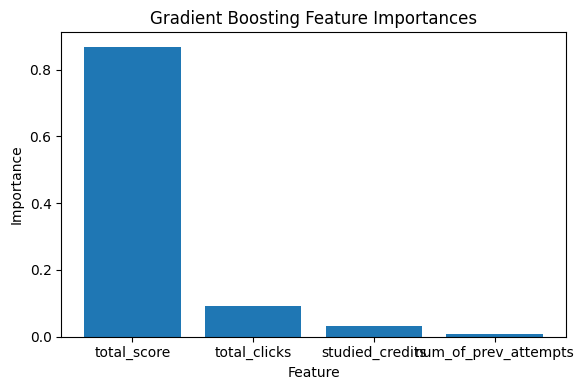

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Load & prepare data
csv_path = 'oulad_merged_final.csv'  # adjust path if needed
df = pd.read_csv(csv_path)

# 2. Clean numeric features
features = ['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=features + ['final_result']).reset_index(drop=True)

# 3. Encode target and split
X = df[features]
y = LabelEncoder().fit_transform(df['final_result'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# 5. Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# 6. Evaluation
print("Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Gradient Boosting Accuracy:", round(accuracy_score(y_test, y_pred_gb), 4))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# 7. Feature importances (Gradient Boosting)
importances = gb.feature_importances_
plt.figure(figsize=(6,4))
plt.bar(features, importances)
plt.title('Gradient Boosting Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


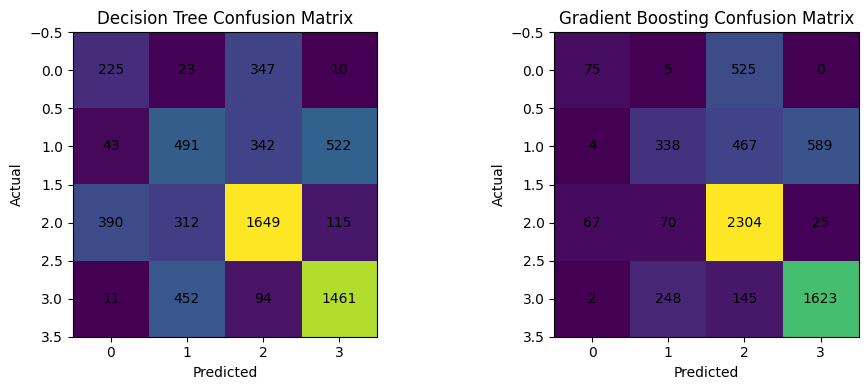

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# 1. Load & prepare data
csv_path = 'oulad_merged_final.csv'  # adjust path if needed
df = pd.read_csv(csv_path)

# 2. Clean numeric features
features = ['total_score', 'total_clicks', 'studied_credits', 'num_of_prev_attempts']
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna(subset=features + ['final_result']).reset_index(drop=True)

# 3. Encode target and split
X = df[features]
y = LabelEncoder().fit_transform(df['final_result'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Decision Tree and Gradient Boosting
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# 5. Predict
y_pred_dt = dt.predict(X_test)
y_pred_gb = gb.predict(X_test)

# 6. Compute confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_gb = confusion_matrix(y_test, y_pred_gb)

# 7. Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

for ax, cm, title in zip(axes, [cm_dt, cm_gb],
                         ['Decision Tree', 'Gradient Boosting']):
    ax.imshow(cm)
    ax.set_title(f'{title} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    # annotate cells
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()
